In this exploration notebook, we shall try to uncover the basic information about the dataset which will help us build our models / features. 

Let us first import the necessary modules.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#import missingno as msno
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
import pylab
import calendar
from scipy import stats
#import missingno as msno
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import  preprocessing, ensemble
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

Loading the training dataset and looking at the top few rows.

In [5]:
import os
os.listdir('.')

['data',
 '.git',
 'renthop.ipynb',
 '.ipynb_checkpoints',
 'Kaggle-renthop.torrent',
 'README.md']

In [9]:
os.listdir('./data')

['test.json',
 'train.json',
 'date.pdf',
 'images_sample.zip',
 'sample_submission.csv',
 'Kaggle-renthop']

In [24]:
train_df = pd.read_json("./data/train.json")
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10.0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000.0,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004.0,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007.0,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013.0,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


Wow. This dataset looks interesting. It has numerical features, categorical features, date feature, text features and image features.  

Let us load the test data as well and check the number of rows in train and test to start with.

In [11]:
test_df = pd.read_json("./data/test.json")
print("Train Rows : ", train_df.shape[0])
print("Test Rows : ", test_df.shape[0])

Train Rows :  49352
Test Rows :  74659


### Size of Data

In [12]:
train_df.shape

(49352, 15)

In [13]:
test_df.shape

(74659, 14)

#### Variable Identification

In [14]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 49352 entries, 10.0 to 99994.0
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [15]:
# Are there values missing
train_df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

In [16]:
#How many columns with different datatypes are there?
train_df.get_dtype_counts()

float64    3
int64      3
object     9
dtype: int64

In [17]:
##Describe gives statistical information about numerical columns in the dataset
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [18]:
#train_dfPriceLimited = train_df.copy()
#upperLimit = np.percentile(train_dfPriceLimited.price.values, 99)
#train_dfPriceLimited['price'].ix[train_dfPriceLimited['price']>upperLimit] = upperLimit
#fig,(ax1,ax2)= plt.subplots(ncols=2)
#fig.set_size_inches(13,5)
#sn.distplot(train_df.price.values, bins=50, kde=True,ax=ax1)
#sn.distplot(train_dfPriceLimited.price.values, bins=50, kde=True,ax=ax2)

**Target Variable**

Before delving more into the features, let us first have a look at the target variable 'interest level'

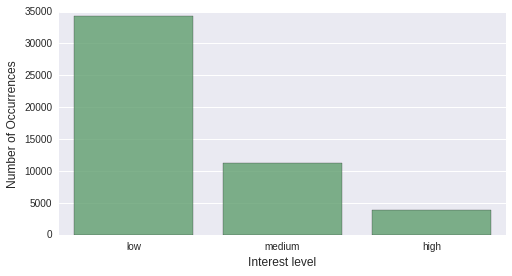

In [19]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

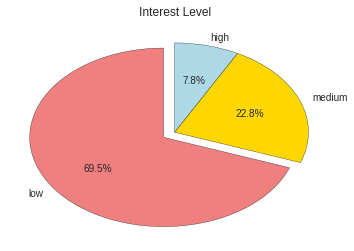

In [20]:
#target variable
labels = ["low","medium","high"]
sizes = train_df.interest_level.value_counts().values
explode=[0.1,0,0]
colors = ['lightcoral','gold','lightblue']
patches,texts,autotexts = plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%",
                        startangle=90)
plt.title("Interest Level")
plt.show()

Interest level is low for most of the cases followed by medium and then high which makes sense.

Now let us start looking into the numerical features present in the dataset. Numerical features are

 - bathrooms
 - bedrooms
 - price
 - latitude
 - longitude

The last two are actually not numerical variables, but for now let us just consider it to be numerical.

**Bathrooms:**

Let us first start with bathrooms.

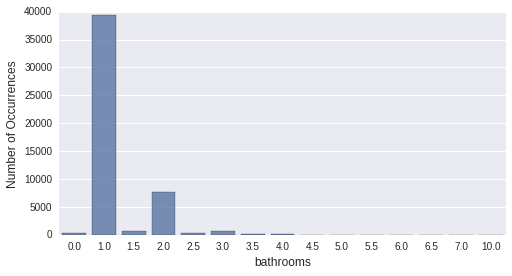

In [21]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

In [22]:
#train_df['bathrooms'].unique().value_counts

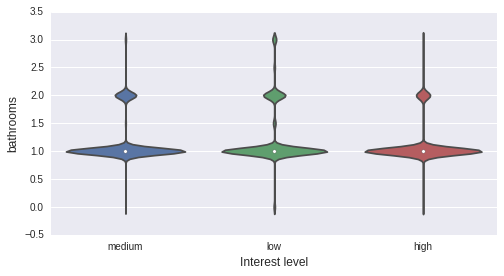

In [26]:
train_df['bathrooms'].ix[train_df['bathrooms']>3] = 3
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=train_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('bathrooms', fontsize=12)
plt.show()

Looks like evenly distributed across the interest levels. Now let us look at the next feature 'bedrooms'.

**Bedrooms:**

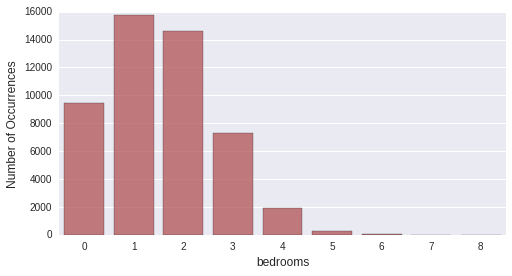

In [27]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

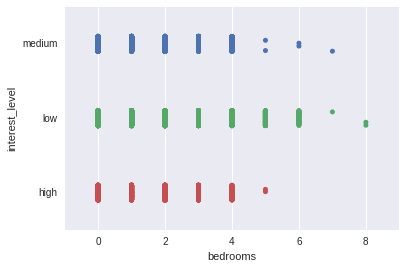

In [28]:
sns.stripplot(x="bedrooms", y="interest_level",data=train_df,jitter=True);

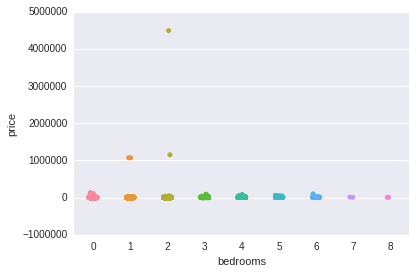

In [29]:
sns.stripplot(x="bedrooms", y="price",data=train_df,jitter=True);

In [30]:
#investigate awkward points
train_df[train_df.price>=1000000]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
12168.0,1.0,2,5d3525a5085445e7fcd64a53aac3cb0a,2016-06-24 05:02:58,,West 116th Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",low,40.8011,7208794,-73.9480,d1737922fe92ccb0dc37ba85589e6415,[],1150000,40 West 116th Street
32611.0,1.0,2,cd25bbea2af848ebe9821da820b725da,2016-06-24 05:02:11,,Hudson Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",low,40.7299,7208764,-74.0071,d1737922fe92ccb0dc37ba85589e6415,[],4490000,421 Hudson Street
55437.0,1.0,1,37385c8a58176b529964083315c28e32,2016-05-14 05:21:28,,West 57th Street,"[Doorman, Cats Allowed, Dogs Allowed]",low,40.7676,7013217,-73.9844,8f5a9c893f6d602f4953fcc0b8e6e9b4,[],1070000,333 West 57th Street
57803.0,1.0,1,37385c8a58176b529964083315c28e32,2016-05-19 02:37:06,This 1 Bedroom apartment is located on a prime...,West 57th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7676,7036279,-73.9844,18133bc914e6faf6f8cc1bf29d66fc0d,[https://photos.renthop.com/2/7036279_924b52f0...,1070000,333 West 57th Street


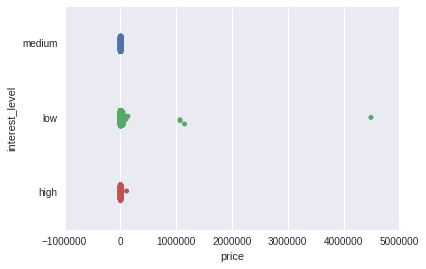

In [32]:
sns.stripplot(x="price",y="interest_level",data=train_df,jitter=True);

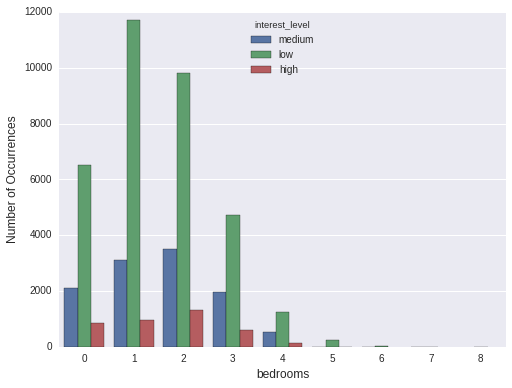

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

**Price:**

Now let us look at the price variable distribution.

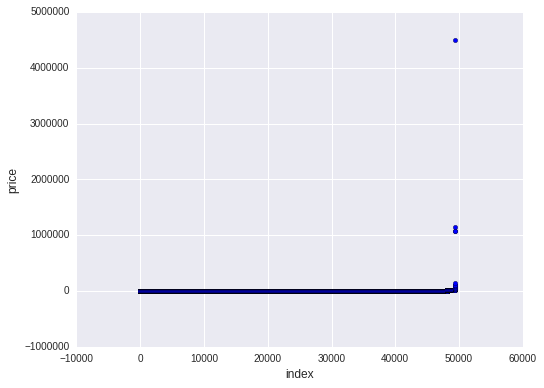

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

Looks like there are some outliers in this feature. So let us remove them and then plot again.

In [39]:
ulimit = np.percentile(train_df.price.values, 99.9)
ulimit

30000.0

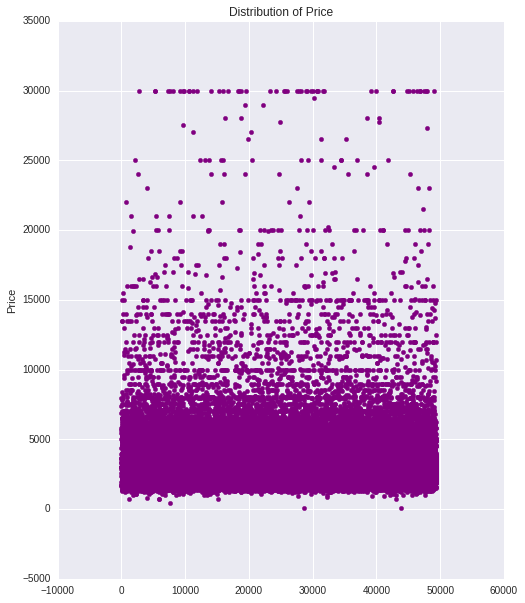

In [40]:
ulimit = np.percentile(train_df.price.values, 99.9)
train_df['price'].ix[train_df['price']>ulimit] = ulimit
plt.figure(figsize=(8, 10))
plt.scatter(range(train_df.shape[0]), train_df["price"].values,color='purple')
plt.ylabel("Price")
plt.title("Distribution of Price");

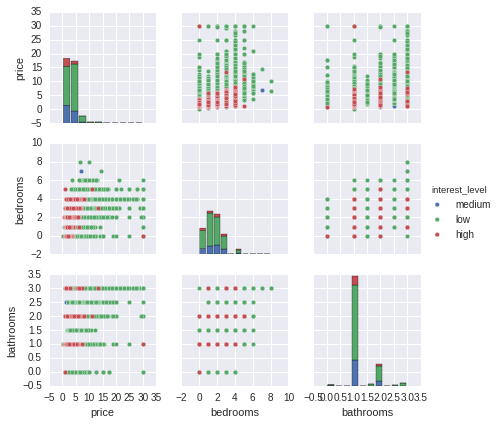

In [41]:
# scale price for a plot
train_df['price'] = train_df['price']/1000.
g = sns.pairplot(train_df[['price','interest_level','bedrooms',\
                 'bathrooms']], hue="interest_level",size=2)

Looks like price has few extremes, let's eliminate those to have a better picture.

In [42]:
train_df.price.describe([0,0.75,0.98,0.99])

count    49352.000000
mean         3.659889
std          2.219184
min          0.043000
0%           0.043000
50%          3.150000
75%          4.100000
98%          9.995000
99%         13.000000
max         30.000000
Name: price, dtype: float64

In [56]:
train_df[train_df.price>13].groupby('interest_level').size()

interest_level
high        2
low       473
medium      6
dtype: int64

In [57]:
train_df[train_df.price>13].groupby('interest_level').interest_level.value_counts()

interest_level  interest_level
high            high                2
low             low               473
medium          medium              6
dtype: int64

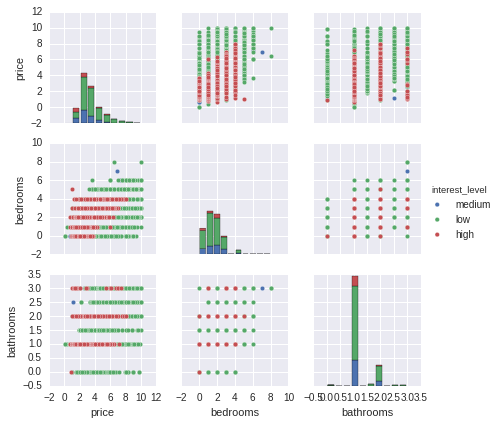

In [58]:
# 98% of listings fall under a price of 10k
g = sns.pairplot(train_df.ix[train_df.price<10,['price','interest_level','bedrooms',\
                 'bathrooms']], hue="interest_level",size=2)

Overall no surprises here, tolerance for higher price moves higher as the number of bedrooms and bathrooms increases. Let's look at bathrooms in a bit more details.

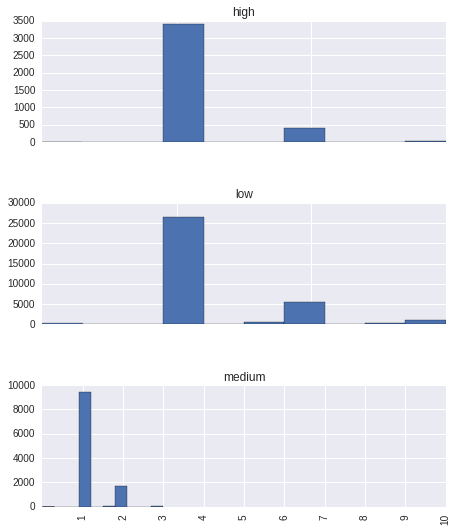

In [59]:
train_df.hist(by='interest_level',column = 'bathrooms',align='mid',sharex=True,\
        bins=10,layout=(3,1),figsize=(7,9))
plt.xticks(np.arange(1,11))
plt.show()

In [60]:
train_df.groupby('interest_level').bathrooms.value_counts()

interest_level  bathrooms
high            1.0           3413
                2.0            407
                3.0             18
                0.0              1
low             1.0          26581
                2.0           5566
                3.0            952
                1.5            605
                0.0            306
                2.5            274
medium          1.0           9428
                2.0           1687
                3.0             65
                1.5             40
                0.0              6
                2.5              3
dtype: int64

The distribution is right skewed as we can see.

Now let us look at the latitude and longitude variables.

**Latitude & Longitude:**

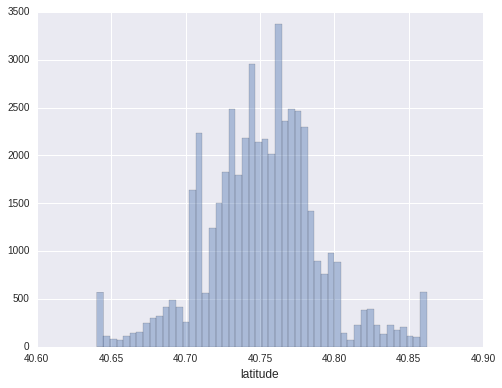

In [61]:
llimit = np.percentile(train_df.latitude.values, 1)
ulimit = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].ix[train_df['latitude']<llimit] = llimit
train_df['latitude'].ix[train_df['latitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)
plt.show()

So the latitude values are primarily between 40.6 and 40.9. Now let us look at the longitude values.

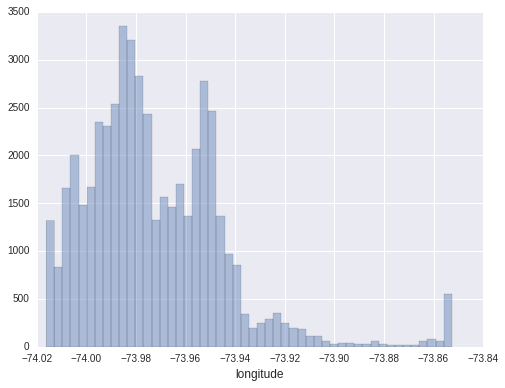

In [62]:
llimit = np.percentile(train_df.longitude.values, 1)
ulimit = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].ix[train_df['longitude']<llimit] = llimit
train_df['longitude'].ix[train_df['longitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12)
plt.show()

The longitude values range between -73.8 and -74.02. So the data corresponds to the **New York City**.

**Created:**

Now let us look at the date column 'created' 

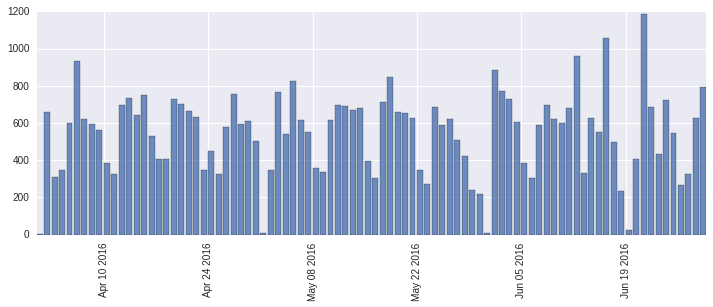

In [63]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["date_created"] = train_df["created"].dt.date
cnt_srs = train_df['date_created'].value_counts()


plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

So we have data from April to June 2016 in our train set. Now let us look at the test set as well and see if they are also from the same date range. 

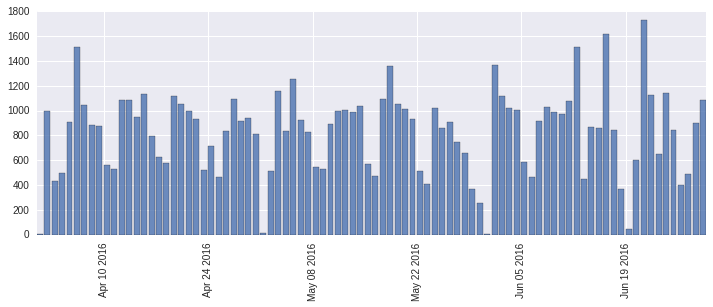

In [64]:
test_df["created"] = pd.to_datetime(test_df["created"])
test_df["date_created"] = test_df["created"].dt.date
cnt_srs = test_df['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

Looks very similar to the train set dates and so we are good to go.!

We shall also look at the hour-wise listing trend (Just for fun)

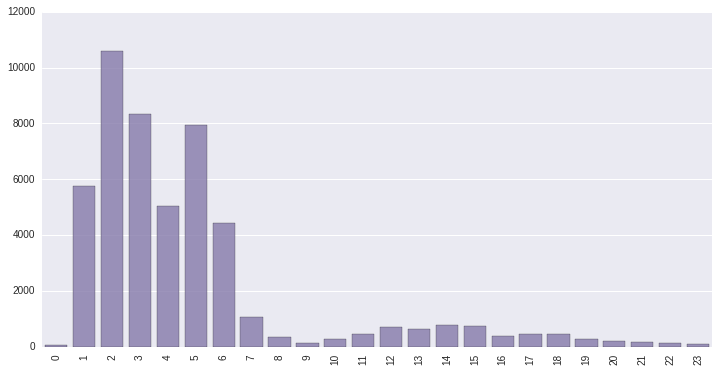

In [67]:
train_df["hour_created"] = train_df["created"].dt.hour
cnt_srs = train_df['hour_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.show()

Looks like listings are created during the early hours of the day (1 to 7am). May be that is when the traffic is less and so the updates are happening.

Now let us look at some of the categorical variables.

**Display Address:**

Display_address that appear less than 2 times: 63.22%
Display_address that appear less than 10 times: 89.6%
Display_address that appear less than 50 times: 97.73%
Display_address that appear less than 100 times: 99.26%
Display_address that appear less than 500 times: 100.0%


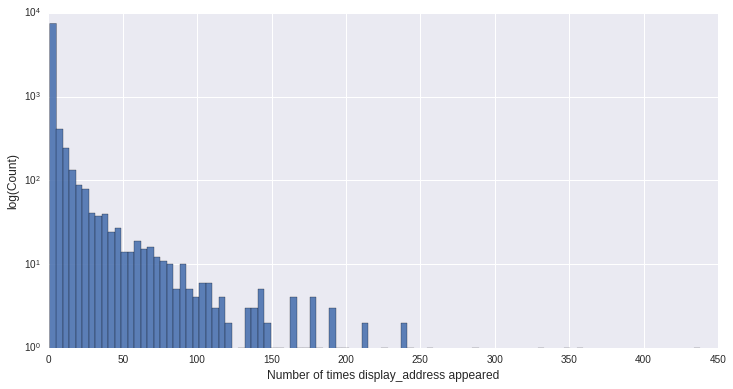

In [68]:
cnt_srs = train_df.groupby('display_address')['display_address'].count()

for i in [2, 10, 50, 100, 500]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(cnt_srs.values, bins=100, log=True, alpha=0.9)
plt.xlabel('Number of times display_address appeared', fontsize=12)
plt.ylabel('log(Count)', fontsize=12)
plt.show()

In [84]:
train_df.groupby('display_address').size()

display_address
                                           135
\tEast 10th Street and East 11th Street      1
\tWashington Street                          1
                                             2
  Allen street                               1
  Hell's Kitchen, Midtown  West              3
  Hell's Kitchen, Midtown West               2
  Hell's Kitchen, Midtown West               4
 11th Street                                 2
 17th Street                                 1
 1st Ave.                                    1
 1st ave                                     1
 236th Street                                1
 2nd Ave.                                    3
 2nd Street                                  1
 2nd ave                                     1
 30th Ave.                                   1
 30th Avenue                                 1
 32nd St.                                    2
 330 east 30th street                        1
 38th St.                                   

Most of the display addresses occur less than 100 times in the given dataset. None of the display address occur more than 500 times.

**Number of Photos:**

This competition also has a huge database of photos of the listings. To start with, let us look at the number of photos given for listings.

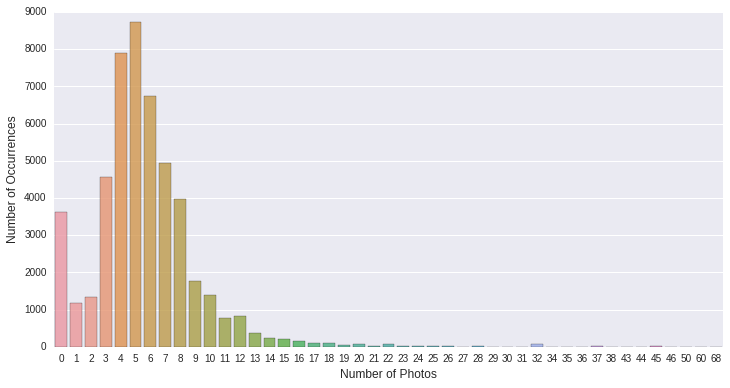

In [85]:
train_df["num_photos"] = train_df["photos"].apply(len)
cnt_srs = train_df['num_photos'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

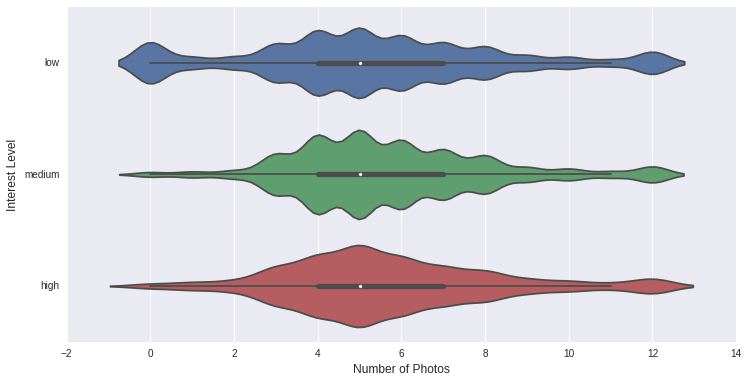

In [86]:
train_df['num_photos'].ix[train_df['num_photos']>12] = 12
plt.figure(figsize=(12,6))
sns.violinplot(x="num_photos", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

Let us now look at the number of features variable and see its distribution.

**Number of features:**

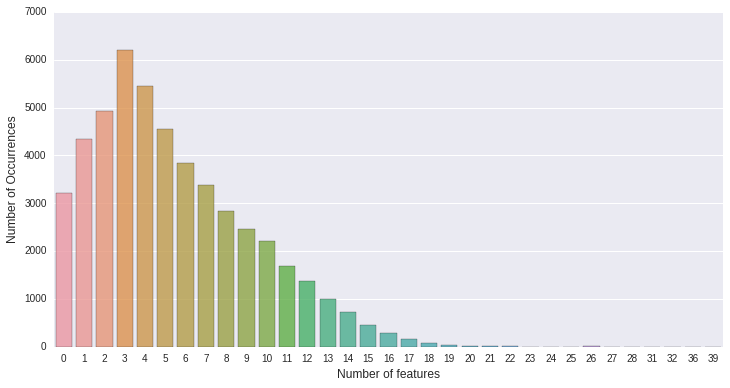

In [87]:
train_df["num_features"] = train_df["features"].apply(len)
cnt_srs = train_df['num_features'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

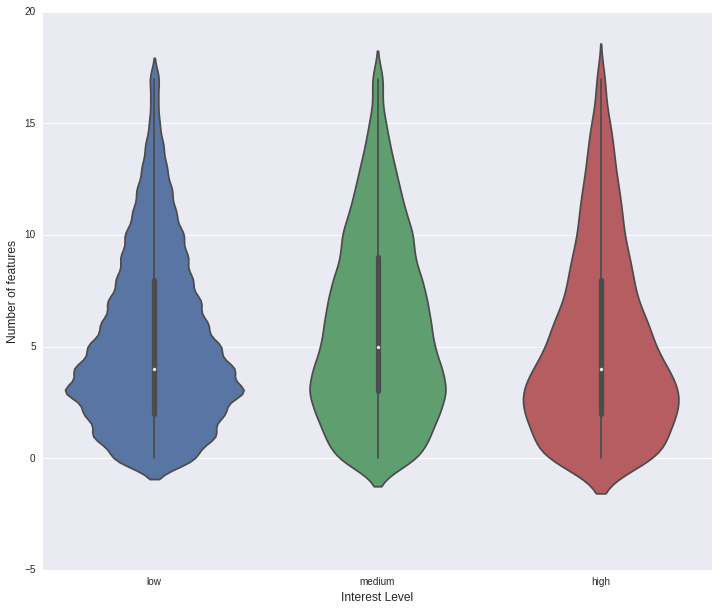

In [88]:
train_df['num_features'].ix[train_df['num_features']>17] = 17
plt.figure(figsize=(12,10))
sns.violinplot(y="num_features", x="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Number of features', fontsize=12)
plt.show()

### Correlation Between Price and Other Features

Since price has got high impact with Interest Level. It is interesting to understand what other features correlate with price

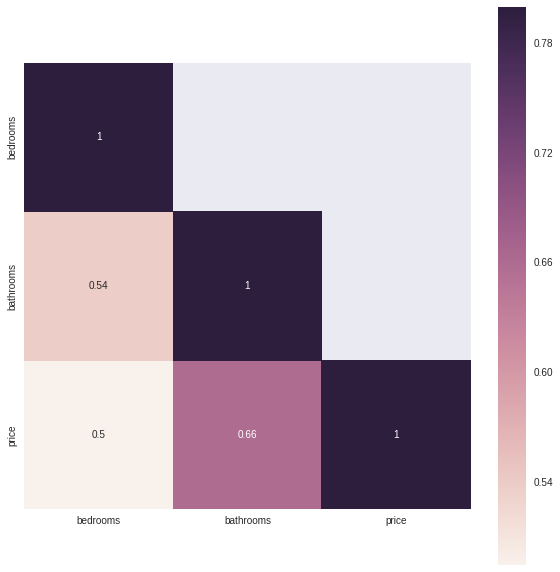

In [89]:
corrMatt = train_df[["bedrooms","bathrooms","price"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

Let's create a big dataframe containing all the dummies for the different keywords in "features". The lower() method will allow us to group equal keywords which are written differently, i.e. "Laundry in Building" and "Laundry In Building".
The columns of this dataframe will be 1 if the keyword IS used in the entry, 0 otherwise.

In [90]:
dummies = train_df['features'].str.join(sep=',').str.lower().str.get_dummies(sep=',')
dummies.head(5)

,!!!!low fee!!!!,$1000. move-in visa giftcard will be handed to new tenants upon rental lease signing,$1500. move-in visa giftcard will be handed to new tenants upon rental lease signing,$250 application fee with background and credit check. board interview and approval.,$250 security deposit,$500 security deposit,$600 gift card for move-ins prior to june 19,& atm machine on-site,* marvelous midtown gem * spacious sundrenched studio * stunning prewar details * cats ok **,** all brand new no fee! * expansive 2br mcmansion * private terrace * cook's ss kitchen * elev/lndry bldg * 3 blks to l train **,...,xxlarge studio,yard,yoga / dance studio,yoga an pilates class,yoga and spin studios,yoga classes,yoga room,yoga studio,subway,• on-site lifestyle concierge by luxury attaché •24/7 doorman • state of the art cardiovascular and weight training equipment • 24-hour valet parking garage • valet services including dry cleaning
10.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100004.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100007.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100013.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
dummies.shape

(49352, 1294)

1294 different keywords is quite a lot... and we are not even trying to split things like "$1000. move-in visa giftcard will be handed to new tenants upon rental lease signing" to obtain new ones.
Anyway, let's focus on the most frequent of the unique entries.

In [93]:
dummies.sum().sort_values(ascending= False).head(40)

elevator                 26272
hardwood floors          23558
cats allowed             23540
dogs allowed             22035
doorman                  20966
dishwasher               20804
laundry in building      18638
no fee                   18065
fitness center           13252
laundry in unit           9345
pre-war                   9149
roof deck                 6555
outdoor space             5270
dining room               5150
high speed internet       4299
balcony                   3058
swimming pool             2730
new construction          2608
terrace                   2313
exclusive                 2167
loft                      2101
garden/patio              1943
wheelchair access         1358
prewar                    1349
common outdoor space      1293
hardwood                  1058
fireplace                  919
simplex                    908
lowrise                    789
garage                     756
laundry room               724
reduced fee                699
furnishe

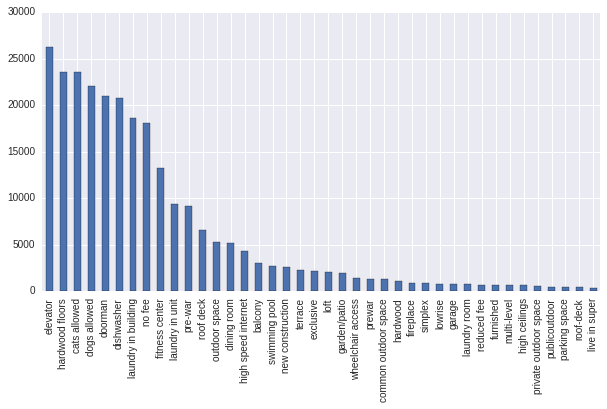

In [92]:
dummies.sum().sort_values(ascending= False).head(40).plot(kind = 'bar', figsize = (10,5))

Let's compute the average interest levels for the most frequent 100 keywords, and store this information in a new dataframe.

In [94]:
frequent_features = dummies.sum().sort_values(ascending= False).head(100).index;
ff_interest_df = pd.DataFrame(index = frequent_features, columns = ['low','medium','high','count'])

for feature in frequent_features:
    # select index where feature is present
    ixes = dummies[feature].astype(bool)
    temp = pd.concat([dummies[ixes][feature],train_df['interest_level']], axis = 1, join = 'inner')
    ff_interest_df.loc[feature] = temp.interest_level.value_counts()/len(temp)
    ff_interest_df.loc[feature,'count'] = len(temp)
    
print(ff_interest_df.head(5))

                      low    medium       high  count
elevator         0.696407   0.23466  0.0689327  26272
hardwood floors  0.627091  0.288437  0.0844724  23558
cats allowed     0.725021  0.206967  0.0680119  23540
dogs allowed     0.729884  0.204175  0.0659405  22035
doorman          0.732329  0.214729  0.0529429  20966


And now... let's see which frequent keywords are associated with higher interest levels by sorting the values of the 'high' column.

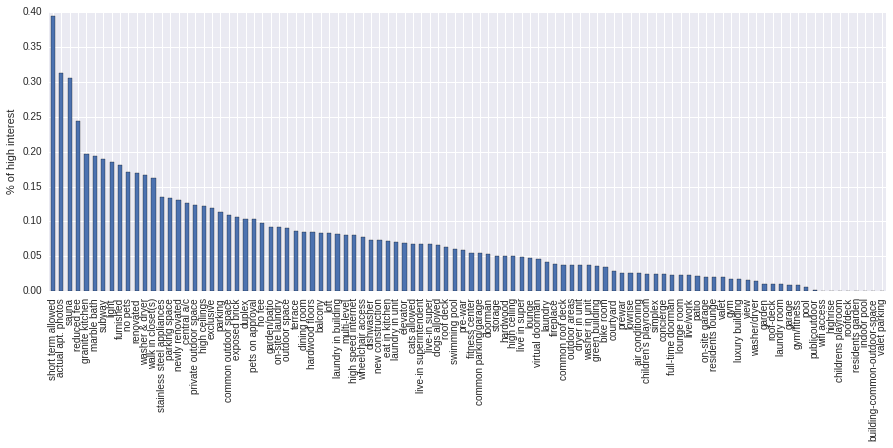

In [95]:
ff_interest_df['high'].sort_values(ascending = False).plot(kind = 'bar', figsize = (15,5))
plt.gca().set_ylabel('% of high interest')

Plotting the averages of all interest levels for the most frequent features yields

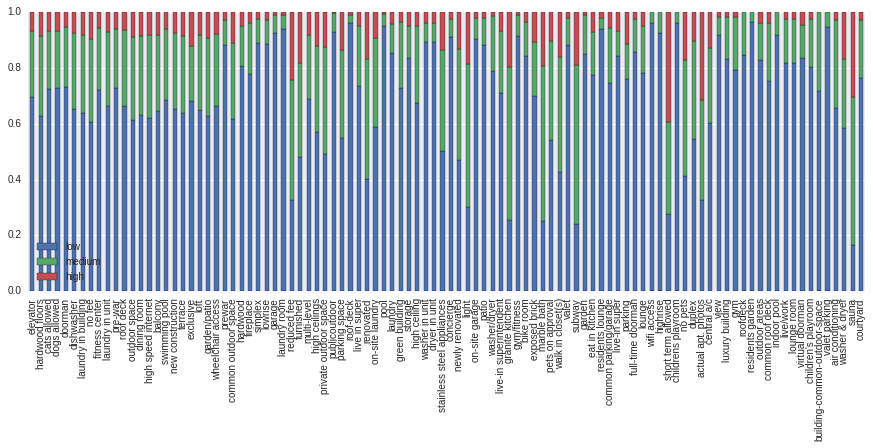

In [96]:
ff_interest_df[['low','medium','high']].plot(kind = 'bar', stacked = True, figsize = (15,5))

In [97]:

ulimit = np.percentile(train_df.price.values, 95)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

train_df["num_photos"] = train_df["photos"].apply(len)
train_df["num_features"] = train_df["features"].apply(len)
train_df["num_description_words"] = train_df["description"].apply(lambda x: len(x.split(" ")))
train_df["created"] = pd.to_datetime(train_df["created"])
#train_df["created_year"] = train_df["created"].dt.year
train_df["created_month"] = train_df["created"].dt.month
train_df["created_day"] = train_df["created"].dt.day
train_df = train_df[train_df["latitude"] != 0]
train_df = train_df[train_df["longitude"] != 0]

num_feats = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
             "num_photos", "num_features", "num_description_words", "created_month", "created_day"]


In [98]:
categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
        if train_df[f].dtype=='object':
            #print(f)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train_df[f].values))
            train_df[f] = lbl.transform(list(train_df[f].values))
            num_feats.append(f)

In [99]:
X = train_df[num_feats]
y = train_df["interest_level"]
X.head()

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_description_words,created_month,created_day,display_address,manager_id,building_id,street_address
10.0,1.5,3,40.7145,-73.9425,3.000,5,0,95,6,24,6544,1239,2431,14074
10000.0,1.0,2,40.7947,-73.9667,5.465,11,5,9,6,12,4506,1583,5862,14195
100004.0,1.0,1,40.7388,-74.0018,2.850,8,4,94,4,17,7387,2965,5806,5876
100007.0,1.0,1,40.7539,-73.9677,3.275,3,2,80,4,18,5703,225,1201,8574
100013.0,1.0,4,40.8241,-73.9493,3.350,3,1,68,4,28,8271,2081,0,11554


Logarithmic Loss, or simply Log Loss, is a classification loss function often used as an evaluation metric in kaggle competitions. Since success in these competitions hinges on effectively minimising the Log Loss, it makes sense to have some understanding of how this metric is calculated and how it should be interpreted.

Log Loss quantifies the accuracy of a classifier by penalising false classifications. Minimising the Log Loss is basically equivalent to maximising the accuracy of the classifier, but there is a subtle twist which we’ll get to in a moment.

In order to calculate Log Loss the classifier must assign a probability to each class rather than simply yielding the most likely class. Mathematically Log Loss is defined as

- \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^M y_{ij} \log \, p_{ij}

where N is the number of samples or instances, M is the number of possible labels, y_{ij} is a binary indicator of whether or not label j is the correct classification for instance i, and p_{ij} is the model probability of assigning label j to instance i. A perfect classifier would have a Log Loss of precisely zero. Less ideal classifiers have progressively larger values of Log Loss. If there are only two classes then the expression above simplifies to

- \frac{1}{N} \sum_{i=1}^N [y_{i} \log \, p_{i} + (1 - y_{i}) \log \, (1 - p_{i})].

Note that for each instance only the term for the correct class actually contributes to the sum.

In [100]:
from sklearn.metrics import accuracy_score, log_loss

In [101]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [102]:
random_state = 123

In [103]:
rf1 = RandomForestClassifier(n_estimators=250, criterion='entropy',  n_jobs = -1,  random_state=random_state)
rf1.fit(X_train, y_train)
y_val_pred = rf1.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.60723222728686299

In [104]:
rf2= RandomForestClassifier(n_estimators=250, criterion='gini',  n_jobs = -1, random_state=random_state)
rf2.fit(X_train, y_train)
y_val_pred = rf2.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.62295907422653307

In [105]:
gbc = GradientBoostingClassifier(random_state=random_state)
gbc.fit(X_train, y_train)
y_val_pred = gbc.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.61692521941897416

In [106]:
from sklearn.ensemble import VotingClassifier 


In [107]:
eclf = VotingClassifier(estimators=[('rf1', rf1), ('rf2', rf2), ('gbc', gbc)], voting='soft')
eclf.fit(X_train, y_train)
y_val_pred = eclf.predict_proba(X_val)
#acc = accuracy_score(y_val, y_val_pred)
#print("Accuracy: {:.4%}".format(acc))
log_loss(y_val, y_val_pred)

0.59871123892409028

In [108]:
eclf = VotingClassifier(estimators=[('rf1', rf1), ('rf2', rf2), ('gbc', gbc)], voting='soft', weights = [3,1,1])
eclf.fit(X_train, y_train)
y_val_pred = eclf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.59993308560092296

In [109]:
eclf = VotingClassifier(estimators=[('rf1', rf1), ('rf2', rf2), ('gbc', gbc)], voting='soft', weights = [3,1,2])
eclf.fit(X_train, y_train)
y_val_pred = eclf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.59825432755828956

In [110]:
labels2idx = {label: i for i, label in enumerate(eclf.classes_)}
labels2idx

{'high': 0, 'low': 1, 'medium': 2}

In [111]:
X_val.head()

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_description_words,created_month,created_day,display_address,manager_id,building_id,street_address
25237.0,3.0,3,40.7725,-73.9819,6.895,6,10,199,6,14,4325,2338,3915,3602
35717.0,1.0,1,40.7372,-73.9981,3.700,3,3,42,6,8,7387,2063,1598,976
39814.0,1.0,2,40.7188,-73.9870,3.391,5,4,141,6,21,6692,1280,0,362
26414.0,1.0,2,40.7724,-73.9813,3.825,9,3,79,6,29,8474,1654,0,12545
37793.0,1.0,2,40.7315,-73.9875,6.500,6,6,54,6,4,4708,1756,6641,4518


In [57]:
submission = pd.DataFrame({
        "listing_id": X_val.index,
        "high": y_val_pred[:,0],
        "medium":y_val_pred[:,2],
        "low":y_val_pred[:,1]
    })
    
columnsTitles=["listing_id","high","medium","low"]
submission=submission.reindex(columns=columnsTitles)
submission.to_csv('submission.csv', index=False)

In [112]:
clf = RandomForestClassifier(n_estimators=2000)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.60755378899770784

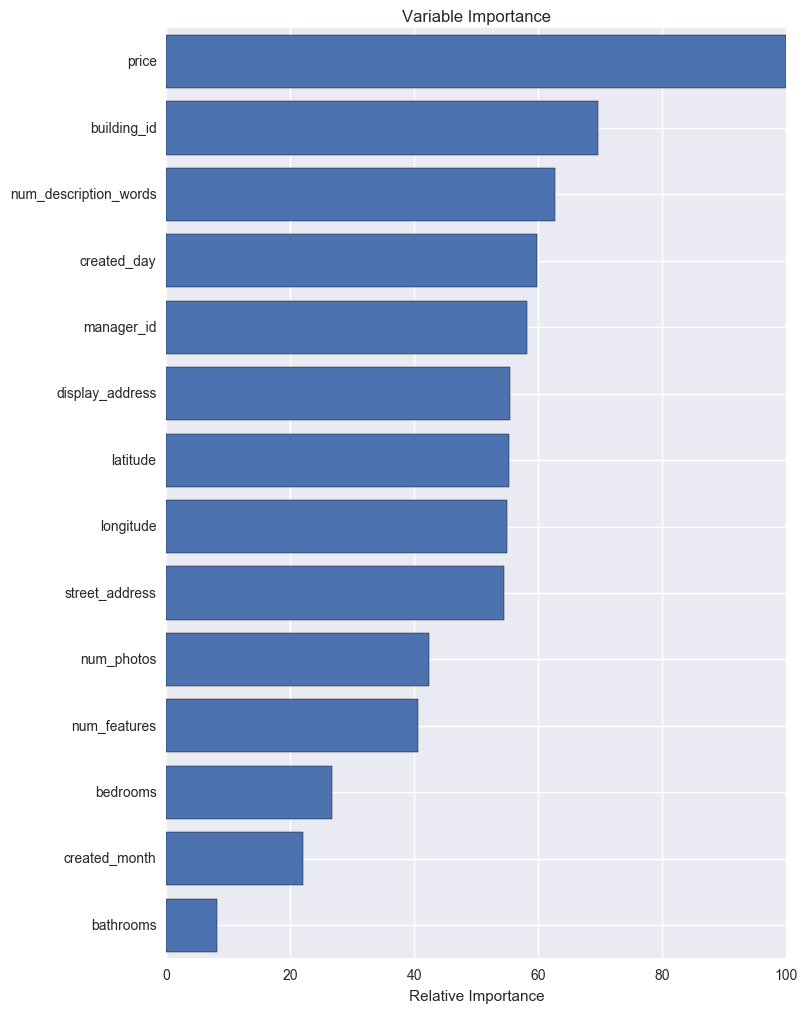

In [59]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X_train.columns[sorted_idx]
plt.figure(figsize=(8,12))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [60]:
clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.82442891305629062

In [61]:
clf = AdaBoostClassifier(n_estimators=2000)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

1.0976839153667226

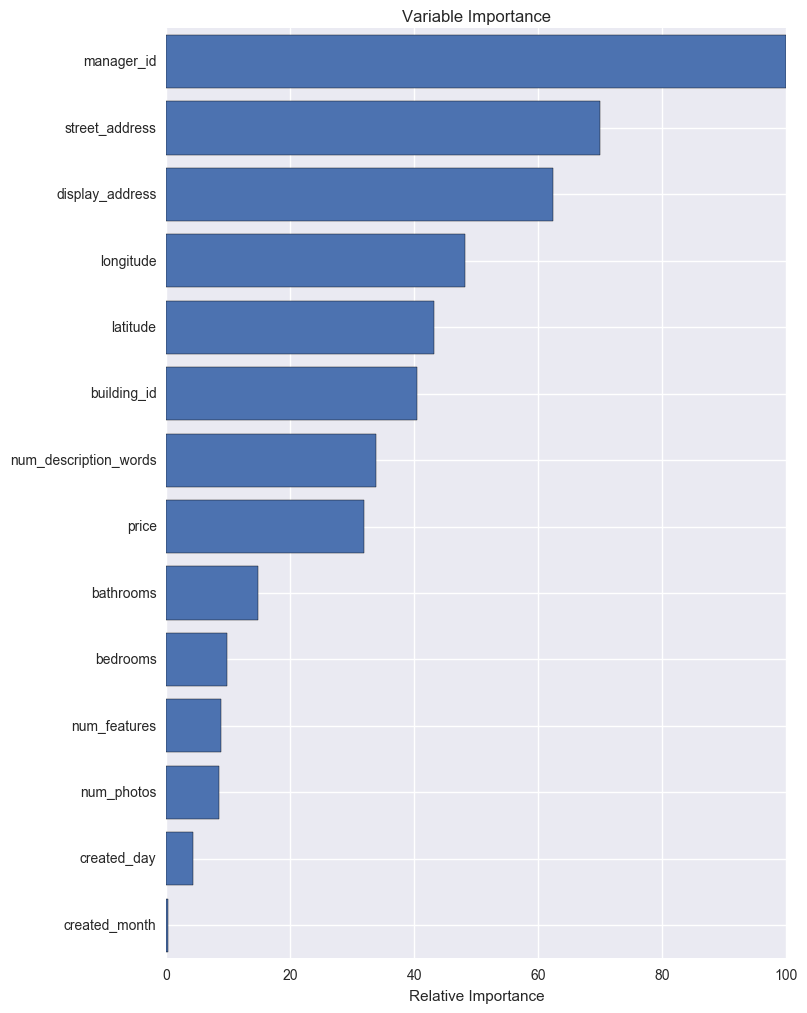

In [62]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X_train.columns[sorted_idx]
plt.figure(figsize=(8,12))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [63]:
clf = GradientBoostingClassifier(n_estimators=2000, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.61119375365463624

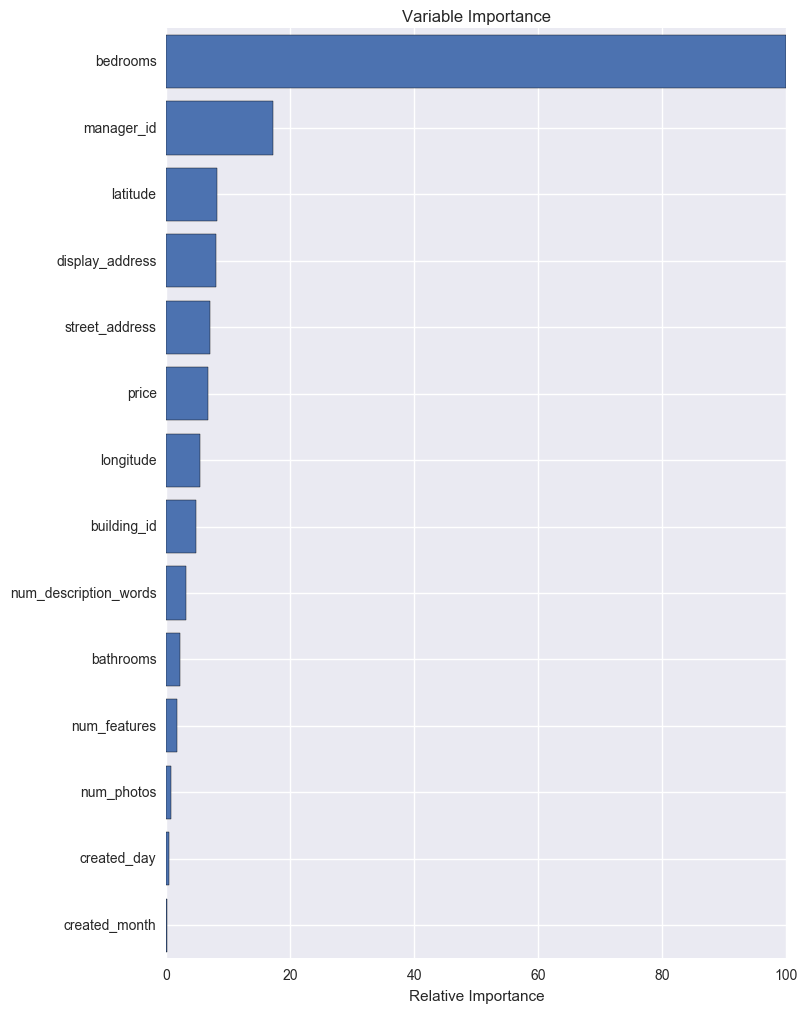

In [64]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X_train.columns[sorted_idx]
plt.figure(figsize=(8,12))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
terrain = sns.color_palette(palette='terrain',n_colors=10)
plasma = sns.color_palette(palette='plasma',n_colors=10)
rainbow = sns.color_palette(palette='rainbow',n_colors=6)
%matplotlib inline

from bokeh.io import output_notebook
from bokeh.layouts import gridplot,row,column
from bokeh.plotting import figure,show
output_notebook()

Loading BokehJS ...

In [2]:
p = figure(title="interest level based on geography",y_range=(40.65,40.85),x_range=(-74.05,-73.85))
p.xaxis.axis_label = 'longitude'
p.yaxis.axis_label = 'latitude'
lowLat=train_df['latitude'][train_df['interest_level']=='low']
lowLong=train_df['longitude'][train_df['interest_level']=='low']
medLat=train_df['latitude'][train_df['interest_level']=='medium']
medLong=train_df['longitude'][train_df['interest_level']=='medium']
highLat=train_df['latitude'][train_df['interest_level']=='high']
highLong=train_df['longitude'][train_df['interest_level']=='high']
p.circle(lowLong,lowLat,size=3,color=terrain.as_hex()[1],fill_alpha=0.1,line_alpha=0.1)#,legend='low'
p.circle(medLong,medLat,size=3,color=plasma.as_hex()[9],fill_alpha=0.1,line_alpha=0.1)#,legend='med'
p.circle(highLong,highLat,size=3,color=plasma.as_hex()[5],fill_alpha=0.1,line_alpha=0.1)#,legend='high'
show(p, notebook_handle=True)

NameError: name 'train_df' is not defined

In [ ]:
p1 = figure(width=500, height=500, title=None,y_range=(40.65,40.85),x_range=(-74.05,-73.85))
p1.circle(lowLong,lowLat,size=3,color=terrain.as_hex()[1],fill_alpha=0.1,line_alpha=0.1,legend='low')
p2 = figure(width=500, height=500, title=None,y_range=(40.65,40.85),x_range=(-74.05,-73.85))
p2.circle(medLong,medLat,size=3,color=plasma.as_hex()[9],fill_alpha=0.1,line_alpha=0.1,legend='med')
p3 = figure(width=500, height=500, title=None,y_range=(40.65,40.85),x_range=(-74.05,-73.85))
p3.circle(highLong,highLat,size=3,color=plasma.as_hex()[5],fill_alpha=0.1,line_alpha=0.1,legend='high')
show(column(p1,p2,p3), notebook_handle=True)